In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
!pip install -U scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
!pip install category_encoders
!pip install wandb
!pip install onnx
!pip install skl2onnx
!pip install onnxruntime
!pip install onnxmltools!pip install category_encoders
!pip install wandb
!pip install onnx
!pip install skl2onnx
!pip install onnxruntime
!pip install onnxmltools

ERROR: Invalid requirement: 'onnxmltools!pip'


In [4]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import wandb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer
import onnxruntime as rt
from skl2onnx import convert_sklearn, __version__, update_registered_converter
from skl2onnx.common.data_types import FloatTensorType, StringTensorType
from skl2onnx.common.data_types import Int64TensorType
from skl2onnx.common.shape_calculator import calculate_linear_classifier_output_shapes
from onnxmltools.convert.xgboost.operator_converters.XGBoost import convert_xgboost  # noqa
import pprint

import wandb
import os

warnings.filterwarnings("ignore")

In [5]:
os.environ["WANDB_API_KEY"] = "9b24652fd248c5ffcab3d4a54eca3edd254b97bb"

In [6]:
import sklearn
sklearn.__version__





'1.0.1'

Loading the dataset

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/rajap20/streamlit-example/master/data_final.csv')

In [8]:
df.head(5)

,Customer_id,Date_disb,pay_type,area_code,pin_code,state,dealer,product_code,tenure,roi,emi,proc_fee,asset_cost,loan_amt,gender,qualification,employ_type,resid_type,age,cibil_score,net_salary,net_irr,fraud
0,0,2/13/2020,ACH,3075,530041,AP,DEALER,SC,0.470588,-0.793282,0.124252,-0.093758,87000,71000,M,OTHERS,SAL,O,0.306122,-0.906781,0.158169,-1.321153,0
1,1,06-02-2020,ADM,3075,532123,AP,DEALER,SC,0.352941,-0.952045,0.083863,-0.572295,61500,51000,F,PG,SAL,O,0.551020,0.163204,1.161336,-1.308269,0
2,2,10-02-2020,ADM,3075,533218,AP,ASC,SC,0.352941,0.318061,0.210079,0.913555,87000,74038,M,SSC,SEP,O,0.530612,NaN,0.910545,0.605033,0
3,3,10-02-2020,ADM,3075,532484,AP,DEALER,SC,0.352941,-1.309262,0.166511,0.649593,84000,69720,M,OTHERS,AGR,O,0.224490,-0.167982,-0.544048,-1.098901,0
4,4,10-02-2020,ADM,3075,530046,AP,DEALER,SC,0.352941,-0.713900,0.092091,-0.572295,61500,52220,F,HSC,SAL,O,0.224490,NaN,-0.343415,-0.986164,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11702 entries, 0 to 11701
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_id    11702 non-null  int64  
 1   Date_disb      11702 non-null  object 
 2   pay_type       11702 non-null  object 
 3   area_code      11702 non-null  int64  
 4   pin_code       11702 non-null  int64  
 5   state          11702 non-null  object 
 6   dealer         11702 non-null  object 
 7   product_code   11702 non-null  object 
 8   tenure         11702 non-null  float64
 9   roi            11702 non-null  float64
 10  emi            11702 non-null  float64
 11  proc_fee       11702 non-null  float64
 12  asset_cost     11702 non-null  int64  
 13  loan_amt       11702 non-null  int64  
 14  gender         11698 non-null  object 
 15  qualification  11698 non-null  object 
 16  employ_type    11698 non-null  object 
 17  resid_type     11698 non-null  object 
 18  age   

In [10]:
df = df.drop(['pin_code'], axis = 1)
df.columns

Index(['Customer_id', 'Date_disb', 'pay_type', 'area_code', 'state', 'dealer',
       'product_code', 'tenure', 'roi', 'emi', 'proc_fee', 'asset_cost',
       'loan_amt', 'gender', 'qualification', 'employ_type', 'resid_type',
       'age', 'cibil_score', 'net_salary', 'net_irr', 'fraud'],
      dtype='object')

Feature Set Selection

In [11]:
df.columns

Index(['Customer_id', 'Date_disb', 'pay_type', 'area_code', 'state', 'dealer',
       'product_code', 'tenure', 'roi', 'emi', 'proc_fee', 'asset_cost',
       'loan_amt', 'gender', 'qualification', 'employ_type', 'resid_type',
       'age', 'cibil_score', 'net_salary', 'net_irr', 'fraud'],
      dtype='object')

In [12]:
x_features = [
              'area_code', 
              'state', 'resid_type', 'net_irr', 'proc_fee',
       'asset_cost', 'loan_amt', 'emi', 'net_salary', 'roi', 'tenure',
       'age']

In [13]:
cat_features = [
                'area_code', 
                'state', 'resid_type']

In [14]:
num_features = list(set(x_features) - set(cat_features))
num_features

['age',
 'net_irr',
 'emi',
 'loan_amt',
 'asset_cost',
 'net_salary',
 'tenure',
 'roi',
 'proc_fee']

In [15]:
df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11702 entries, 0 to 11701
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_code   11702 non-null  int64  
 1   state       11702 non-null  object 
 2   resid_type  11698 non-null  object 
 3   net_irr     11702 non-null  float64
 4   proc_fee    11702 non-null  float64
 5   asset_cost  11702 non-null  int64  
 6   loan_amt    11702 non-null  int64  
 7   emi         11702 non-null  float64
 8   net_salary  11702 non-null  float64
 9   roi         11702 non-null  float64
 10  tenure      11702 non-null  float64
 11  age         11698 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 1.1+ MB


In [16]:
df[cat_features] = df[cat_features].astype(object)
df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11702 entries, 0 to 11701
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_code   11702 non-null  object 
 1   state       11702 non-null  object 
 2   resid_type  11698 non-null  object 
 3   net_irr     11702 non-null  float64
 4   proc_fee    11702 non-null  float64
 5   asset_cost  11702 non-null  int64  
 6   loan_amt    11702 non-null  int64  
 7   emi         11702 non-null  float64
 8   net_salary  11702 non-null  float64
 9   roi         11702 non-null  float64
 10  tenure      11702 non-null  float64
 11  age         11698 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 1.1+ MB


In [17]:
df

,Customer_id,Date_disb,pay_type,area_code,state,dealer,product_code,tenure,roi,emi,proc_fee,asset_cost,loan_amt,gender,qualification,employ_type,resid_type,age,cibil_score,net_salary,net_irr,fraud
0,0,2/13/2020,ACH,3075,AP,DEALER,SC,0.470588,-0.793282,0.124252,-0.093758,87000,71000,M,OTHERS,SAL,O,0.306122,-0.906781,0.158169,-1.321153,0
1,1,06-02-2020,ADM,3075,AP,DEALER,SC,0.352941,-0.952045,0.083863,-0.572295,61500,51000,F,PG,SAL,O,0.551020,0.163204,1.161336,-1.308269,0
2,2,10-02-2020,ADM,3075,AP,ASC,SC,0.352941,0.318061,0.210079,0.913555,87000,74038,M,SSC,SEP,O,0.530612,NaN,0.910545,0.605033,0
3,3,10-02-2020,ADM,3075,AP,DEALER,SC,0.352941,-1.309262,0.166511,0.649593,84000,69720,M,OTHERS,AGR,O,0.224490,-0.167982,-0.544048,-1.098901,0
4,4,10-02-2020,ADM,3075,AP,DEALER,SC,0.352941,-0.713900,0.092091,-0.572295,61500,52220,F,HSC,SAL,O,0.224490,NaN,-0.343415,-0.986164,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11697,11697,2/28/2021,ADM,3052,UP,DEALER,MC,0.470588,0.476825,0.258508,1.427003,124300,98900,M,SSC,SEP,O,0.122449,-0.448216,-0.243098,0.231391,0
11698,11698,2/28/2021,ACH,3052,UP,ASC,MC,0.588235,0.631619,0.235976,1.740351,136643,105900,M,OTHERS,SEP,O,0.285714,NaN,0.910545,0.279707,0
11699,11699,2/28/2021,ACH,3052,UP,ASC,MC,0.352941,-1.352922,0.088631,0.586583,61651,52900,M,HSC,SEP,O,0.306122,NaN,0.057852,0.141202,0
11700,11700,09-02-2021,ACH,3074,UP,ASC,MC,0.470588,0.834042,0.219147,0.978268,129300,88000,M,OTHERS,SEP,O,0.306122,NaN,-0.092623,0.685559,0


#### Defining Functions

In [18]:
def prepare_data(X,
                 y,
#                 num_scaler = None,
#                 num_imputer = None,
#                 cat_imputer = None,
                 cat_encoder,
                 num_scaler,
                 num_features,
                 cat_features,
                 train_size = 0.8,
                 seed = 100):
  
  # Split the dataset into train and test split
  x_train, x_test, y_train, y_test = train_test_split(X,
                                                      y,
                                                      train_size = train_size,
                                                      random_state = seed)
  
  
  # encoder the categorical features
  cat_encoder.fit(X=x_train, y=y_train)
  x_train_encoded = cat_encoder.transform(x_train)
  x_test_encoded = cat_encoder.transform(x_test)

  # scaling numeric features
  num_scaler.fit(x_train[num_features])
  x_train_scaler = num_scaler.transform(x_train[num_features])
  x_test_scaler = num_scaler.transform(x_test[num_features])

  return x_train_encoded, x_test_encoded, y_train, y_test



def prepare_data_SMOTE(X,
                 y,
#                 num_imputer = None,
#                 cat_imputer = None,
                 cat_encoder,
                 num_scaler,
                 num_features,
                 cat_features,
                 train_size = 0.8,
                 seed = 100):
  
  # Split the dataset into train and test split
  x_train, x_test, y_train, y_test = train_test_split(X,
                                                      y,
                                                      train_size = train_size,
                                                      random_state = seed)
  
  oversample = SMOTENC(categorical_features=cat_features, random_state=seed)
  x_train_sm, y_train_sm = oversample.fit_resample(x_train, y_train) 
  
  # encoder the categorical features
  cat_encoder.fit(X=x_train_sm, y=y_train_sm)
  x_train_encoded = cat_encoder.transform(x_train_sm)
  x_test_encoded = cat_encoder.transform(x_test)

  """oversample = SMOTE()
  x_train_sm, y_train_sm = oversample.fit_resample(x_train_encoded, y_train)

  return x_train_sm, x_test_encoded, y_train_sm, y_test"""

  return x_train_encoded, x_test_encoded, y_train_sm, y_test
  

In [19]:
def get_total_cost( actual, predicted, cost_TNs, cost_FNs ):
    # Get the confusion matrix and calculate cost
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    return tn * cost_TNs + fn * cost_FNs

def run_model_experiment(model,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         labels,
                         name,
                         config = None,
                         tags = None):
  
  
  model.fit(x_train, y_train)

  wandb.init(project='mlops', config=config, tags = tags)
  wandb.run.name = name

  test_df=pd.DataFrame({
                      "y_test":y_test,
                       "y_prob":model.predict_proba(x_test)[:,1]
                      })
  cost_df = pd.DataFrame( columns = ['prob', 'cost'])
  idx = 0
  cost_FPs = 350
  cost_TPs = -84

  ## Iterate cut-off probability values between 0.1 and 0.5
  for each_prob in range(0,100):
    cost = get_total_cost(test_df.y_test, test_df.y_prob.map(lambda x: 1 if x > (each_prob/100) else 0), cost_TPs, cost_FPs)
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

  cost_df = cost_df.sort_values( 'cost', ascending = True )
  min_cost = cost_df.iloc[0,1]
  cutoff_prob = cost_df.iloc[0,0]

  test_df['y_pred'] = test_df.y_prob.map(lambda x: 1 if x > cutoff_prob else 0)

  

  clasf_matrix = confusion_matrix(test_df.y_test, test_df.y_pred)
  sensitivity = [round(clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[1,0]),4)]
  specificity = [round(clasf_matrix[0,0]/(clasf_matrix[0,1]+clasf_matrix[0,0]),4)]
  precision = [round(clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[0,1]),4)]
  accuracy = [round((clasf_matrix[1,1]+clasf_matrix[0,0])/(clasf_matrix[1,1]+clasf_matrix[1,0]+clasf_matrix[0,1]+clasf_matrix[0,0]),4)]
  F_Score = [round(2*(clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[0,1]))*(clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[1,0]))/((clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[0,1])) + (clasf_matrix[1,1]/(clasf_matrix[1,1]+clasf_matrix[1,0]))), 4)]
  cost = min_cost

  print(clasf_matrix)

  wandb.log( {
      "sensitivity" : sensitivity, 
      "specificity": specificity,
      "precision" : precision,
      "accuracy" : accuracy,
      "F_Score" : F_Score,
      "cost" : cost})
  
  y_probas = test_df["y_prob"]
  
  
  """wandb.sklearn.plot_classifier(model, 
                               x_train, 
                               x_test, 
                               y_train, 
                               y_test,
                               y_probas,
                               lables,  
                               model_name=name,
                              feature_names=None)"""
  
  wandb.Artifact(name, 
                 type = 'model',
                 description = config)

  wandb.save()
  wandb.finish()

  return model, cutoff_prob

In [20]:
from category_encoders import OneHotEncoder, TargetEncoder


ohe_encoder = OneHotEncoder(cols = cat_features,
                            use_cat_names = True)


target_encoder = TargetEncoder(cols = cat_features)


std_scaler = StandardScaler()


In [21]:
lables = [0,1]

### Splitting into Dev and Prod dataset 

In [22]:
X = df[x_features]
y = df['fraud']

#### XGBoost with one hot encoding 

In [23]:
x_train, x_test, y_train, y_test = prepare_data(X,
                                                y,
                                                cat_encoder = ohe_encoder,
                                                num_scaler = std_scaler,
                                                num_features = num_features,
                                                cat_features = cat_features)

params = { 
          "n_estimators": 301,
          "learning_rate": 0.1 ,
          "max_depth": 20,
          "min_child_weight": 7,
          "gamma": 0.1,
          "colsample_bytree" : 0.7
          }

from xgboost import XGBClassifier

xgb_model_ohe = XGBClassifier(**params) 

xgb_model_ohe, xgb_model_ohe_cutoff = run_model_experiment(xgb_model_ohe,
                                   x_train,
                                   y_train,
                                   x_test,
                                   y_test,
                                   lables,
                                   name = 'XGBoostWithOHE',
                                   tags = ['XGBoost', 'experiment', 'OheEncoder'])

wandb: Currently logged in as: madhur1 (use `wandb login --relogin` to force relogin)


wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


[[2080   79]
 [ 159   23]]


cost,▁
cost,-119070.0


In [24]:
x_train.shape

(9361, 106)

In [25]:
x_train[0:10]

,area_code_3000.0,area_code_3051.0,area_code_3078.0,area_code_3018.0,area_code_3039.0,area_code_3003.0,area_code_3052.0,area_code_3007.0,area_code_3037.0,area_code_3021.0,area_code_3004.0,area_code_3072.0,area_code_3068.0,area_code_3029.0,area_code_3038.0,area_code_3058.0,area_code_3054.0,area_code_3025.0,area_code_3001.0,area_code_3053.0,area_code_3046.0,area_code_3091.0,area_code_3019.0,area_code_3005.0,area_code_3009.0,area_code_3028.0,area_code_3036.0,area_code_3006.0,area_code_3014.0,area_code_3061.0,area_code_3022.0,area_code_3016.0,area_code_3090.0,area_code_3033.0,area_code_3041.0,area_code_3089.0,area_code_3075.0,area_code_3042.0,area_code_3030.0,area_code_3047.0,...,area_code_3065.0,area_code_3032.0,state_TN,state_OR,state_WB,state_MH,state_RJ,state_UP,state_AP,state_AS,state_BR,state_KA,state_JH,state_PB,state_HP,state_MP,state_KL,state_JK,state_UC,state_GJ,state_HA,state_TR,state_DL,state_CG,state_PY,state_CH,state_MN,resid_type_O,resid_type_R,resid_type_L,resid_type_nan,net_irr,proc_fee,asset_cost,loan_amt,emi,net_salary,roi,tenure,age
11449,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.358060,-0.023084,69262,61500,0.198672,1.161336,-0.737714,0.254902,0.408163
6928,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.096107,1.090665,129800,100899,0.154076,-0.092623,0.734815,0.823529,0.102041
11625,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.512670,-1.726064,84035,64900,0.077225,-0.243098,0.040226,0.588235,0.163265
8366,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.525555,0.300482,87900,78999,0.227001,-0.092623,-0.162198,0.352941,0.755102
3882,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.724481,0.743257,115827,67600,0.151458,0.258486,2.262912,0.470588,0.204082
5794,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.966838,-1.726064,68558,52100,0.104806,0.559436,-0.277301,0.333333,0.428571
11169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.169764,0.045887,62200,52800,0.088164,0.358803,-1.352922,0.352941,0.387755
10872,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.657617,-1.227942,64624,52980,0.100972,0.158169,-0.197919,0.352941,0.448980
1611,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.743538,-1.726064,72000,60948,0.159873,-0.443731,1.508786,0.431373,0.367347
5694,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.785681,0.514206,78395,54800,0.066380,0.057852,2.381984,0.588235,0.367347


In [26]:
temp2 = pd.DataFrame({
                    "y_train":y_train,
                    "y_prob":xgb_model_ohe.predict_proba(x_train)[:,1]
                    })

temp2['prediction']= temp2.y_prob.map(lambda x: 1 if x > xgb_model_ohe_cutoff else 0)
temp2

,y_train,y_prob,prediction
11449,0,0.089030,0
6928,0,0.115636,0
11625,0,0.002201,0
8366,1,0.745861,1
3882,0,0.001062,0
...,...,...,...
350,1,0.671725,1
79,0,0.047666,0
8039,1,0.757614,1
6936,0,0.002408,0


In [67]:
xgb_model_ohe.predict_proba(x_train)[0]

array([0.91096985, 0.08903012], dtype=float32)

In [27]:
temp1 = pd.DataFrame({
                    "y_test":y_test,
                      "y_prob":xgb_model_ohe.predict_proba(x_test)[:,1]
                    })

temp1['predictions']= temp1.y_prob.map(lambda x: 1 if x > xgb_model_ohe_cutoff else 0)

In [28]:
temp1.reset_index(drop=True)
#temp1[temp1['predictions']==1].index
#temp1[temp1['index1']==907].index()


temp1['index1'] = temp1.index
temp1.reset_index(drop=True)
temp1
#temp1[temp1['index1']==907].index

,y_test,y_prob,predictions,index1
8515,0,0.002773,0,8515
4283,0,0.085595,0,4283
10389,0,0.143471,0,10389
6557,0,0.003313,0,6557
11653,0,0.041215,0,11653
...,...,...,...,...
1236,1,0.028751,0,1236
3245,0,0.077160,0,3245
11646,0,0.003339,0,11646
7895,0,0.000457,0,7895


In [29]:
temp1

,y_test,y_prob,predictions,index1
8515,0,0.002773,0,8515
4283,0,0.085595,0,4283
10389,0,0.143471,0,10389
6557,0,0.003313,0,6557
11653,0,0.041215,0,11653
...,...,...,...,...
1236,1,0.028751,0,1236
3245,0,0.077160,0,3245
11646,0,0.003339,0,11646
7895,0,0.000457,0,7895


In [30]:
x_test

,area_code_3000.0,area_code_3051.0,area_code_3078.0,area_code_3018.0,area_code_3039.0,area_code_3003.0,area_code_3052.0,area_code_3007.0,area_code_3037.0,area_code_3021.0,area_code_3004.0,area_code_3072.0,area_code_3068.0,area_code_3029.0,area_code_3038.0,area_code_3058.0,area_code_3054.0,area_code_3025.0,area_code_3001.0,area_code_3053.0,area_code_3046.0,area_code_3091.0,area_code_3019.0,area_code_3005.0,area_code_3009.0,area_code_3028.0,area_code_3036.0,area_code_3006.0,area_code_3014.0,area_code_3061.0,area_code_3022.0,area_code_3016.0,area_code_3090.0,area_code_3033.0,area_code_3041.0,area_code_3089.0,area_code_3075.0,area_code_3042.0,area_code_3030.0,area_code_3047.0,...,area_code_3065.0,area_code_3032.0,state_TN,state_OR,state_WB,state_MH,state_RJ,state_UP,state_AP,state_AS,state_BR,state_KA,state_JH,state_PB,state_HP,state_MP,state_KL,state_JK,state_UC,state_GJ,state_HA,state_TR,state_DL,state_CG,state_PY,state_CH,state_MN,resid_type_O,resid_type_R,resid_type_L,resid_type_nan,net_irr,proc_fee,asset_cost,loan_amt,emi,net_salary,roi,tenure,age
8515,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.182648,0.068877,63000,53500,0.026085,-0.092623,-0.956014,0.588235,0.102041
4283,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.592148,-1.044872,61740,52600,0.079749,7.681924,0.754661,0.431373,0.653061
10389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.160101,-0.717048,66000,55900,0.041230,-0.092623,-0.316992,0.588235,0.693878
6557,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.986164,-1.726064,95512,76174,0.113968,0.910545,-0.197919,0.588235,0.224490
11653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.467576,-1.726064,134405,86900,0.222326,0.408961,0.159298,0.431373,0.020408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.311917,0.802861,79000,67227,0.175486,-0.092623,0.238680,0.450980,0.306122
3245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.358060,-1.726064,98600,82900,0.147999,0.158169,0.437134,0.588235,0.632653
11646,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.144423,0.189788,83361,55900,0.061331,-0.343415,-1.130654,0.470588,0.653061
7895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.830506,0.603612,77700,66603,0.177637,-0.293256,0.635588,0.352941,0.142857


In [31]:
temp1

,y_test,y_prob,predictions,index1
8515,0,0.002773,0,8515
4283,0,0.085595,0,4283
10389,0,0.143471,0,10389
6557,0,0.003313,0,6557
11653,0,0.041215,0,11653
...,...,...,...,...
1236,1,0.028751,0,1236
3245,0,0.077160,0,3245
11646,0,0.003339,0,11646
7895,0,0.000457,0,7895


Accuracy

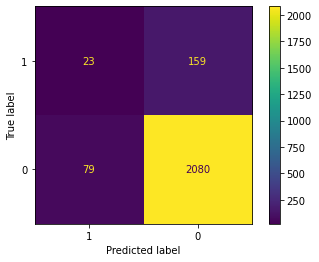

In [32]:
y_test.value_counts()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(temp1['y_test'], temp1['predictions'], labels=[1,0])
ConfusionMatrixDisplay(cm, display_labels = ['1', '0']).plot();

###Understanding the Model using ELI5

In [33]:
!pip install eli5

In [34]:
import eli5.sklearn

In [35]:
X_features = list( x_train.columns )

In [36]:
eli5.explain_weights( 
    xgb_model_ohe, 
    feature_names = X_features )

Weight,Feature
0.0756,state_AP
0.0615,resid_type_O
0.0501,resid_type_R
0.0332,area_code_3030.0
0.0294,area_code_3008.0
0.0291,state_MH
0.0268,state_HP
0.0227,state_RJ
0.0223,state_TN
0.0222,area_code_3087.0


### Explaining the weights for a Non-Fraduelent loan appliacation

In [37]:
x_test.iloc[0]

area_code_3000.0    0.000000
area_code_3051.0    0.000000
area_code_3078.0    1.000000
area_code_3018.0    0.000000
area_code_3039.0    0.000000
                      ...   
emi                 0.026085
net_salary         -0.092623
roi                -0.956014
tenure              0.588235
age                 0.102041
Name: 8515, Length: 106, dtype: float64

In [38]:
y_test.iloc[0]

0

In [39]:
temp1['predictions'].iloc[0]

0

In [40]:
eli5.explain_prediction( xgb_model_ohe,
                         x_test.iloc[0],
                         target_names = ['0', '1'] )

Explanation(estimator='XGBClassifier(colsample_bytree=0.7, gamma=0.1, max_depth=20, min_child_weight=7,\n              n_estimators=301)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target='0', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=2.683842508777009, std=None, value=1.0), FeatureWeight(feature='area_code_3078.0', weight=0.6649729263726709, std=None, value=1.0), FeatureWeight(feature='proc_fee', weight=0.6222052592573065, std=None, value=0.06887674099999999), FeatureWeight(feature='roi', weight=0.5769616254832175, std=None, value=-0.9560139870000001), FeatureWeight(feature='age', weight=0.5242232218418428, std=None, value=0.10204081599999999), FeatureWeight(feature='net_irr', weight=0.37698908725825375, std=None, value=-1.182647878), FeatureWeight(feature='loan_amt', weight=0.32998223839142093, std=None, value=53500.0), FeatureWeight(feature='asset_cost', weight=0.3125375601005204, std=None, value=63000.0), FeatureWeight(feature='state_TN', weight=0.1058496665396509, std=None, value=0.0), FeatureWeight(feature='resid_type_O', weight=0.09707920101708854, std=None, value=1.0), FeatureWeight(feature='state_MH', weight=0.07613065646842533, std=None, value=0.0), FeatureWeight(feature='area_code_3009.0', weight=0.032384654427694344, std=None, value=0.0), FeatureWeight(feature='state_WB', weight=0.02807846883004077, std=None, value=1.0), FeatureWeight(feature='resid_type_R', weight=0.02726552194065384, std=None, value=0.0), FeatureWeight(feature='area_code_3000.0', weight=0.023055052906254016, std=None, value=0.0), FeatureWeight(feature='area_code_3008.0', weight=0.022861837708149098, std=None, value=0.0), FeatureWeight(feature='state_GJ', weight=0.01866499275750846, std=None, value=0.0), FeatureWeight(feature='area_code_3001.0', weight=0.018082760254551185, std=None, value=0.0), FeatureWeight(feature='area_code_3018.0', weight=0.014723657100119419, std=None, value=0.0), FeatureWeight(feature='area_code_3030.0', weight=0.010974756670178306, std=None, value=0.0), FeatureWeight(feature='state_HA', weight=0.00923579414080594, std=None, value=0.0), FeatureWeight(feature='state_MP', weight=0.008395771288216902, std=None, value=0.0), FeatureWeight(feature='state_KL', weight=0.00836083042023196, std=None, value=0.0), FeatureWeight(feature='area_code_3054.0', weight=0.008227088936229766, std=None, value=0.0), FeatureWeight(feature='area_code_3031.0', weight=0.007408880042525866, std=None, value=0.0), FeatureWeight(feature='area_code_3061.0', weight=0.006855334460693406, std=None, value=0.0), FeatureWeight(feature='area_code_3011.0', weight=0.005446029387290864, std=None, value=0.0), FeatureWeight(feature='area_code_3005.0', weight=0.005152396981417237, std=None, value=0.0), FeatureWeight(feature='area_code_3035.0', weight=0.003665695664011634, std=None, value=0.0), Feature

### Explaining the weights for a fraudeulent loan application

In [41]:
temp1.head(40)

,y_test,y_prob,predictions,index1
8515,0,0.002773,0,8515
4283,0,0.085595,0,4283
10389,0,0.143471,0,10389
6557,0,0.003313,0,6557
11653,0,0.041215,0,11653
6629,0,0.001735,0,6629
8424,0,0.075281,0,8424
6831,0,0.147083,0,6831
4002,0,0.003759,0,4002
5126,0,0.037626,0,5126


In [42]:
temp1.iloc[37]

y_test             1.0000
y_prob             0.5487
predictions        1.0000
index1         10010.0000
Name: 10010, dtype: float64

In [43]:
x_test.iloc[37]

area_code_3000.0    1.000000
area_code_3051.0    0.000000
area_code_3078.0    0.000000
area_code_3018.0    0.000000
area_code_3039.0    0.000000
                      ...   
emi                 0.057966
net_salary         -0.794840
roi                 0.508577
tenure              0.588235
age                 0.428571
Name: 10010, Length: 106, dtype: float64

In [ ]:
x_test.iloc[37]_to_csv

In [44]:
y_test.iloc[37]

1

In [45]:
eli5.explain_prediction( xgb_model_ohe,
                         x_test.iloc[37],
                         target_names = ['0', '1'] )

Explanation(estimator='XGBClassifier(colsample_bytree=0.7, gamma=0.1, max_depth=20, min_child_weight=7,\n              n_estimators=301)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=False, targets=[TargetExplanation(target='1', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='resid_type_O', weight=0.8816982705414758, std=None, value=0.0), FeatureWeight(feature='emi', weight=0.7866359734954551, std=None, value=0.057965595), FeatureWeight(feature='area_code_3000.0', weight=0.49444608607238916, std=None, value=1.0), FeatureWeight(feature='net_salary', weight=0.45856750227530596, std=None, value=-0.7948399279999999), FeatureWeight(feature='proc_fee', weight=0.33169532782796346, std=None, value=-1.138535832), FeatureWeight(feature='resid_type_R', weight=0.27483761515007166, std=None, value=1.0), FeatureWeight(feature='state_AP', weight=0.19393317838029153, std=None, value=0.0), FeatureWeight(feature='state_TN', weight=0.17003503002210454, std=None, value=1.0), FeatureWeight(feature='state_RJ', weight=0.0269814882599614, std=None, value=0.0), FeatureWeight(feature='area_code_3004.0', weight=0.026837992990646053, std=None, value=0.0), FeatureWeight(feature='state_OR', weight=0.01961073659649558, std=None, value=0.0), FeatureWeight(feature='area_code_3078.0', weight=0.015110921989433874, std=None, value=0.0), FeatureWeight(feature='state_PB', weight=0.013487290279118085, std=None, value=0.0), FeatureWeight(feature='state_BR', weight=0.007405295636463307, std=None, value=0.0), FeatureWeight(feature='state_WB', weight=0.007317957800246194, std=None, value=0.0), FeatureWeight(feature='area_code_3003.0', weight=0.005482155733576116, std=None, value=0.0), FeatureWeight(feature='area_code_3072.0', weight=0.004482752191342798, std=None, value=0.0), FeatureWeight(feature='area_code_3007.0', weight=0.00396403535369531, std=None, value=0.0), FeatureWeight(feature='area_code_3068.0', weight=0.003486752417520779, std=None, value=0.0), FeatureWeight(feature='state_HP', weight=0.0033426261120412595, std=None, value=0.0), FeatureWeight(feature='state_AS', weight=0.0029661123001988167, std=None, value=0.0), FeatureWeight(feature='state_UP', weight=0.0016512803171403385, std=None, value=0.0), FeatureWeight(feature='state_KA', weight=0.0011604685684897652, std=None, value=0.0), FeatureWeight(feature='area_code_3016.0', weight=0.0006651045996850478, std=None, value=0.0), FeatureWeight(feature='area_code_3091.0', weight=0.0006528534887191399, std=None, value=0.0), FeatureWeight(feature='area_code_3049.0', weight=0.0006290210916300707, std=None, value=0.0), FeatureWeight(feature='area_code_3025.0', weight=0.000494975842743257, std=None, value=0.0)], neg=[FeatureWeight(feature='<BIAS>', weight=-2.683842508777009, std=None, value=1.0), FeatureWeight(feature='age', weight=-0.3615483471568881, std=None, value=0.428571429), FeatureWeight(feature='net

###  Local Interpretation using Using Shapley Values

In [55]:
!pip install shap

In [56]:
import shap

In [124]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.TreeExplainer(xgb_model_ohe)
    shap_values_Model = explainerModel.shap_values(x_test)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], x_test.iloc[[j]])
    return(p)

## Explaining a case of Non Fradulent Loan application

In [136]:
shap.initjs()
shap_plot(0)

## Explaining a case of Fradulent Loan application

In [137]:
shap.initjs()
shap_plot(37)

###Global Explanation of SHAP

In [108]:
explainer = shap.TreeExplainer( xgb_model_ohe )
shap_values = explainer.shap_values( x_train )


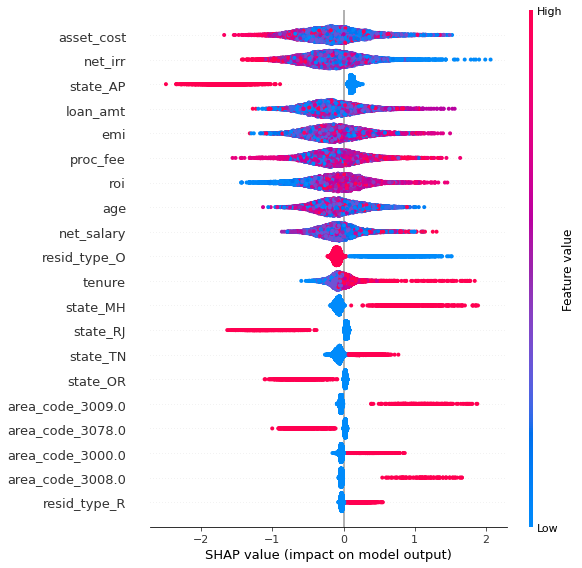

In [112]:
import shap
shap_values = shap.TreeExplainer(xgb_model_ohe).shap_values(x_train)
shap.summary_plot(shap_values, x_train)

### Global Interpretations using Individual Conditional Expectations (ICE)

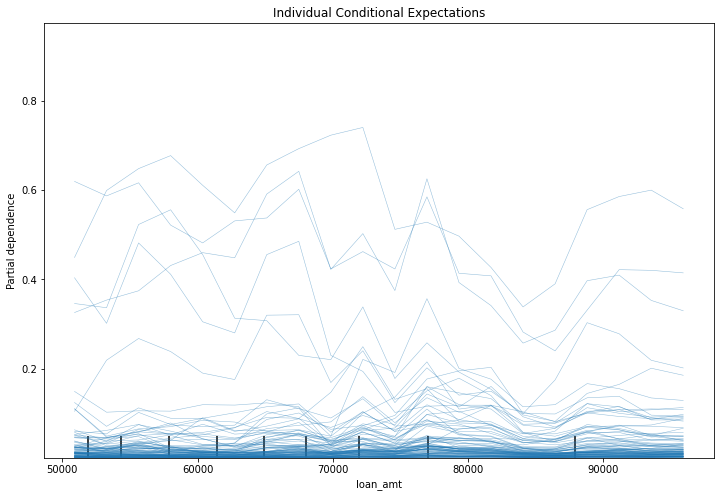

In [101]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    xgb_model_ohe,
    x_train,
    features=["loan_amt"],
    kind="individual",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    ax = ax
)

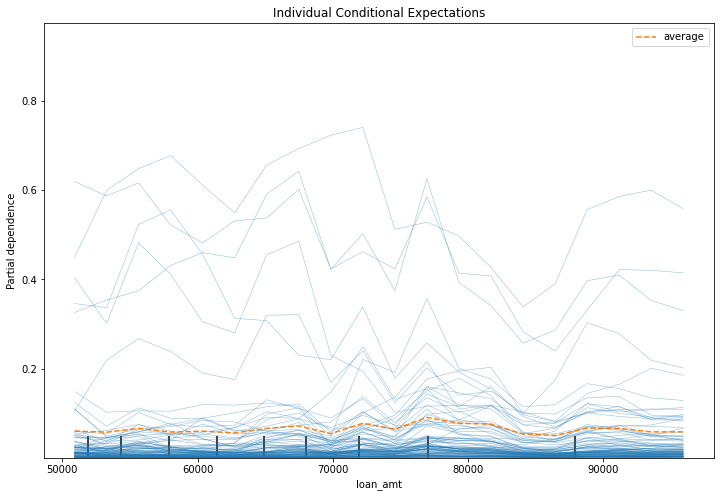

In [102]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    xgb_model_ohe,
    x_train,
    features=["loan_amt"],
    kind="both",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax = ax
)

### Global Interpretations using Partial Dependence Plots- PDP's

In [103]:
from sklearn.inspection import PartialDependenceDisplay

Effect of Asset cost on Fraud classification

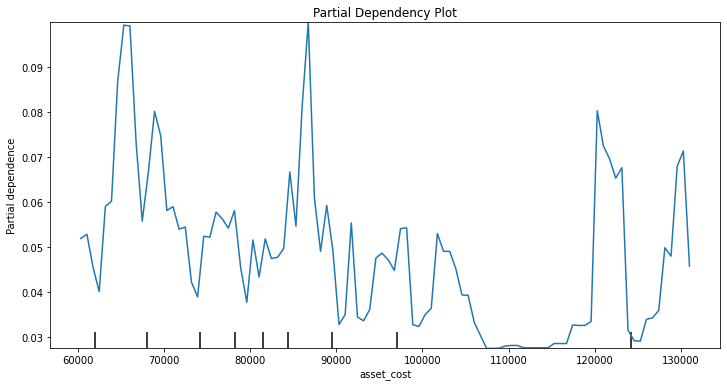

In [105]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(xgb_model_ohe,
                                        x_test,
                                        features = ['asset_cost'],
                                        feature_names = X_features,
                                        ax = ax);

Effect of Loan amount on Fraud classification

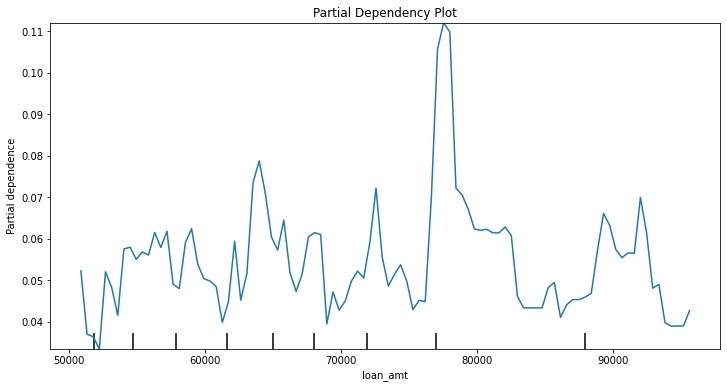

In [107]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(xgb_model_ohe,
                                        x_test,
                                        features = ['loan_amt'],
                                        feature_names = X_features,
                                        ax = ax);

### Appendix

In [116]:
temp1.to_csv('Test data prediction.csv')

In [117]:
x_test.to_csv('Test_data.csv')